In [57]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [58]:
data = pd.read_csv('High_T.csv')
sim = pd.read_csv('data_config-30k-29-octobre-2023.csv')
data

,Unnamed: 0,index,time,ain1,ain2,ain4,ain5,ain8,ain9,ain11,...,ain13,T,PX309_OMEGA_ain2,PX309_OMEGA_ain4,PX309_OMEGA_ain5,thermocouple_AD8495_ain8,thermocouple_AD8495_ain9,LC101_200_ain11,thermocouple_AD8495_ain12,thermocouple_AD8495_ain13
0,0,259810,0.0000,5.43691,3.32417,2.41434,0.23464,-1.34881,-2.79014,1.90905,...,-1.79757,4499.43513,664.83433,482.86704,46.92874,-519.76131,-808.02885,64.27373,-423.88267,-609.51332
1,1,259811,0.0025,6.15632,3.32891,2.41812,0.23370,-1.34786,-2.79330,1.88726,...,-1.81336,5106.73958,665.78175,483.62497,46.73926,-519.57183,-808.66046,63.34566,-426.47228,-612.67138
2,2,259812,0.0050,5.87304,3.32859,2.41212,0.24885,-1.35418,-2.80025,1.88947,...,-1.80862,4867.60346,665.71858,482.42491,49.77099,-520.83505,-810.05001,63.43981,-427.48286,-611.72396
3,3,259813,0.0075,5.84051,3.32417,2.42823,0.24159,-1.32733,-2.77625,1.88441,...,-1.79978,4840.14412,664.83433,485.64613,48.31828,-515.46636,-805.24976,63.22461,-425.46170,-609.95545
4,4,259814,0.0100,5.15363,3.32133,2.40486,0.24728,-1.33996,-2.79362,1.89736,...,-1.80799,4260.29901,664.26588,480.97220,49.45519,-517.99280,-808.72362,63.77607,-426.53544,-611.59764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,3404,263214,8.5100,2.65687,2.25327,1.25943,0.19896,-1.74483,-3.01373,1.70851,...,-1.94757,2152.59534,450.65485,251.88669,39.79153,-598.96541,-852.74695,55.73276,-449.77875,-639.51487
3405,3405,263215,8.5125,3.12900,2.25864,1.26228,0.19485,-1.74799,-3.01752,1.71009,...,-1.95610,2551.15555,451.72859,252.45514,38.97043,-599.59702,-853.50488,55.80001,-450.47352,-641.22023
3406,3406,263216,8.5150,2.70235,2.25833,1.26385,0.19138,-1.73504,-3.00837,1.71704,...,-1.94473,2190.98509,451.66543,252.77095,38.27566,-597.00741,-851.67321,56.09592,-448.95765,-638.94642
3407,3407,263217,8.5175,2.79109,2.26338,1.25722,0.18633,-1.75399,-3.03174,1.70914,...,-1.96021,2265.89841,452.67601,251.44456,37.26508,-600.79708,-856.34714,55.75966,-450.91565,-642.04132


In [59]:
print(sim.columns)
sim

Index(['Time      (s)', 'ISP     (m/s)', 'C*      (m/s)', 'Pe/Pb     (-)',
       'Thrust    (N)', 'Impulse  (Ns)', 'P tank (psia)', 'P inj. (psia)',
       'P comb (psia)', 'P crit (psia)', 'O/F       (-)', 'm. ox. (kg/s)',
       'Gox (kg/s-m2)', 'r.     (mm/s)'],
      dtype='object')


,Time (s),ISP (m/s),C* (m/s),Pe/Pb (-),Thrust (N),Impulse (Ns),P tank (psia),P inj. (psia),P comb (psia),P crit (psia),O/F (-),m. ox. (kg/s),Gox (kg/s-m2),r. (mm/s)
0,0.000,1989.513315,1414.221720,0.821631,4564.183034,4.564183,770.998218,623.897832,336.095410,467.536413,4.161780,1.849677,612.454958,5.297515
1,0.001,1989.501797,1414.213436,0.821631,4564.038213,9.128221,770.965412,623.864988,336.095595,467.511228,4.161634,1.849616,612.225717,5.296622
2,0.002,1989.490443,1414.206239,0.821627,4563.927773,13.692149,770.932609,623.837000,336.093923,467.490075,4.161507,1.849571,612.001735,5.295750
3,0.003,1989.477121,1414.198775,0.821618,4563.804212,18.255953,770.899807,623.807786,336.090090,467.467904,4.161376,1.849522,611.776615,5.294873
4,0.004,1989.462933,1414.191384,0.821605,4563.680835,22.819634,770.867006,623.778884,336.084941,467.445993,4.161245,1.849474,611.551974,5.293997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6829,6.829,1876.977248,1371.643219,0.673794,3640.451743,28053.065119,568.853339,448.847225,275.621440,336.285716,3.504474,1.508951,150.714934,2.818460
6830,6.830,1876.959151,1371.637121,0.673772,3640.311442,28056.705430,568.825308,448.823296,275.612250,336.267970,3.504391,1.508899,150.694736,2.818290
6831,6.831,1876.941052,1371.631024,0.673749,3640.171139,28060.345601,568.797276,448.799367,275.603061,336.250223,3.504307,1.508847,150.674542,2.818120
6832,6.832,1876.922953,1371.624927,0.673727,3640.030833,28063.985632,568.769245,448.775439,275.593871,336.232476,3.504224,1.508796,150.654353,2.817950


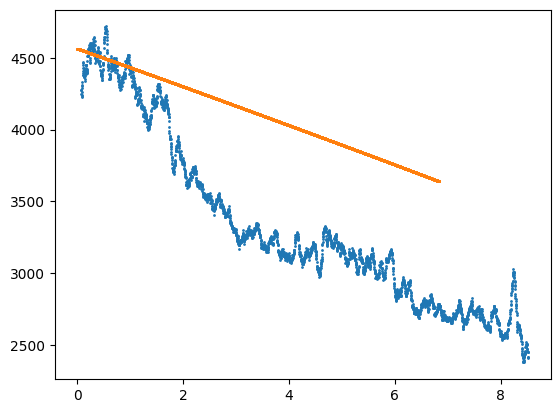

In [60]:
data['T'] = data['T'].rolling(window = 30).mean()
plt.scatter(data['time'],data['T'],s = 1)
plt.scatter(sim['Time      (s)'], sim['Thrust    (N)'], s = 1)